## Final Project Submission

Please fill out:
* Student name: Jordan Lunak
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Eli Thomas
* Blog post URL: https://datalearningblog.science.blog/2019/09/02/models-for-machine-learning-classification/


## Introduction

The module 3 project involves selecting a dataset to answer a question with a classification model. The dataset I will be using for my model is about Autism Spectrum Disorder (ASD). ASD is a developmental disorder affecting communication and behavior. Symptoms for ASD usually are seen in the first two years of life. The model for this dataset is meant to be a screening tool for adults to determine if they should pursue a formal clinical diagnosis. This would be helpful to avoid unnecessary healthcare costs for individuals who do not have the disorder.

The format for analysis will follow the OSEMN framework. Several classification algorithms will be tested to determine best, most predictive model.  The dataset is comprised of 20 features: 10 behavioral features and 10 individual characteristics.

## Dataset Description

 - **Age:** Number Age in years
 - **Gender:** String Male or Female
 - **Ethnicity:** String List of common ethnicities in text format
 - **Born with jaundice:** Boolean (yes or no) Whether the case was born with jaundice
 - **Family member with PDD:** Boolean (yes or no) Whether any immediate family member has a Pervasive Develepmental Disorder
 - **Who is completing the test:** String Parent, self, caregiver, medical staff, clinician ,etc.
 - **Country of residence:** String List of countries in text format
 - **Used the screening app before:** Boolean (yes or no) Whether the user has used a screening app
 - **Screening Method Type Integer (0,1,2,3)** The type of screening methods chosen based on age category (0=toddler, 1=child, 2= adolescent, 3= adult)
 - **10 Question Screening:**
    -  Question 1 Answer Binary (0, 1) The answer code of the question based on the screening method used
     - Question 2 Answer Binary (0, 1) The answer code of the question based on the screening method used
     - Question 3 Answer Binary (0, 1) The answer code of the question based on the screening method used
     - Question 4 Answer Binary (0, 1) The answer code of the question based on the screening method used
     - Question 5 Answer Binary (0, 1) The answer code of the question based on the screening method used
     - Question 6 Answer Binary (0, 1) The answer code of the question based on the screening method used
     - Question 7 Answer Binary (0, 1) The answer code of the question based on the screening method used
     - Question 8 Answer Binary (0, 1) The answer code of the question based on the screening method used
     - Question 9 Answer Binary (0, 1) The answer code of the question based on the screening method used
     - Question 10 Answer Binary (0, 1) The answer code of the question based on the screening method used
 - **Screening Score Integer:** The final score obtained based on the scoring algorithm of the screening method used. This was computed in an automated manner.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import and read data

In [22]:
df = pd.read_csv('/Users/Administrator/Desktop/DataScience/dsc-3-final-project-online-ds-sp-000/autism-screening/Autism_Data.arff')

In [23]:
df.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO
5,1,1,1,1,1,0,1,1,1,1,...,m,Others,yes,no,'United States',no,9,'18 and more',Self,YES
6,0,1,0,0,0,0,0,1,0,0,...,f,Black,no,no,'United States',no,2,'18 and more',Self,NO
7,1,1,1,1,0,0,0,0,1,0,...,m,White-European,no,no,'New Zealand',no,5,'18 and more',Parent,NO
8,1,1,0,0,1,0,0,1,1,1,...,m,White-European,no,no,'United States',no,6,'18 and more',Self,NO
9,1,1,1,1,0,1,1,1,1,0,...,m,Asian,yes,yes,Bahamas,no,8,'18 and more','Health care professional',YES


In [24]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

## Scrubbing the Data

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           704 non-null int64
A2_Score           704 non-null int64
A3_Score           704 non-null int64
A4_Score           704 non-null int64
A5_Score           704 non-null int64
A6_Score           704 non-null int64
A7_Score           704 non-null int64
A8_Score           704 non-null int64
A9_Score           704 non-null int64
A10_Score          704 non-null int64
age                704 non-null object
gender             704 non-null object
ethnicity          704 non-null object
jundice            704 non-null object
austim             704 non-null object
contry_of_res      704 non-null object
used_app_before    704 non-null object
result             704 non-null int64
age_desc           704 non-null object
relation           704 non-null object
Class/ASD          704 non-null object
dtypes: int64(11), object(10)
memory usage: 115.6+ KB


In [26]:
df.age_desc.value_counts()

'18 and more'    704
Name: age_desc, dtype: int64

I will remove the columns 'used_app_before' and 'age_desc' due to being unnecessary data.

In [27]:
df.drop(['used_app_before', 'age_desc'], axis = 1, inplace = True)

In [28]:
df.isna().sum()

A1_Score         0
A2_Score         0
A3_Score         0
A4_Score         0
A5_Score         0
A6_Score         0
A7_Score         0
A8_Score         0
A9_Score         0
A10_Score        0
age              0
gender           0
ethnicity        0
jundice          0
austim           0
contry_of_res    0
result           0
relation         0
Class/ASD        0
dtype: int64

The count of NA values in showing 0, however the string '?' is showing in the dataset head. I will change '?' to NA in order to get accurate count of missing values.

In [29]:
df.replace("?",np.nan,inplace=True)

In [30]:
df.isna().sum()

A1_Score          0
A2_Score          0
A3_Score          0
A4_Score          0
A5_Score          0
A6_Score          0
A7_Score          0
A8_Score          0
A9_Score          0
A10_Score         0
age               2
gender            0
ethnicity        95
jundice           0
austim            0
contry_of_res     0
result            0
relation         95
Class/ASD         0
dtype: int64

Now I can see NA values in 'age', 'ethnicity' and 'relation'. I change the NA in age to the mean of the age. I will change the NA value in ethnicity and relation to 'unknown'.

In [31]:
df.ethnicity.replace(np.nan, 'unknown', inplace = True)
df.relation.replace(np.nan, 'unknown', inplace = True)

In [35]:
df.dropna(inplace = True)

In [36]:
df['age'] = df.age.astype('int')

In [37]:
df.isna().sum()

A1_Score         0
A2_Score         0
A3_Score         0
A4_Score         0
A5_Score         0
A6_Score         0
A7_Score         0
A8_Score         0
A9_Score         0
A10_Score        0
age              0
gender           0
ethnicity        0
jundice          0
austim           0
contry_of_res    0
result           0
relation         0
Class/ASD        0
dtype: int64

In [38]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,0.723647,0.452991,0.458689,0.497151,0.498575,0.284900,0.417379,0.650997,0.324786,0.574074,29.698006,4.883191
std,0.447512,0.498140,0.498646,0.500348,0.500354,0.451689,0.493478,0.476995,0.468629,0.494835,16.507465,2.498051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 703
Data columns (total 19 columns):
A1_Score         702 non-null int64
A2_Score         702 non-null int64
A3_Score         702 non-null int64
A4_Score         702 non-null int64
A5_Score         702 non-null int64
A6_Score         702 non-null int64
A7_Score         702 non-null int64
A8_Score         702 non-null int64
A9_Score         702 non-null int64
A10_Score        702 non-null int64
age              702 non-null int32
gender           702 non-null object
ethnicity        702 non-null object
jundice          702 non-null object
austim           702 non-null object
contry_of_res    702 non-null object
result           702 non-null int64
relation         702 non-null object
Class/ASD        702 non-null object
dtypes: int32(1), int64(11), object(7)
memory usage: 106.9+ KB


In [40]:
df.age.describe()

count    702.000000
mean      29.698006
std       16.507465
min       17.000000
25%       21.000000
50%       27.000000
75%       35.000000
max      383.000000
Name: age, dtype: float64

In [41]:
sum(df.age == 383)

1

An age of 383 is not realistic and is likely a typing error. I will change the error to the mean of the age column.

In [42]:
df.age.replace(383,df.age.mean(),inplace=True)

In [43]:
#checking to make sure age distribution looks realistic now
df.age.describe()

count    702.000000
mean      29.194727
std        9.704615
min       17.000000
25%       21.000000
50%       27.000000
75%       35.000000
max       64.000000
Name: age, dtype: float64

## Exploratory Data Analysis

Checking histogram distributions of data.

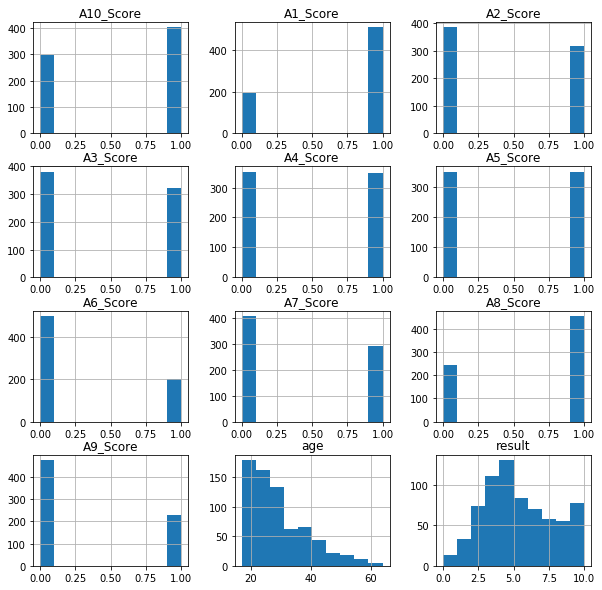

In [44]:
df.hist(figsize = (10,10))
plt.show()

Scores are categorical 0/1. Age has positive skew. Result is closer to normal distribution.

In [45]:
#Separating target and features
target = df['Class/ASD']
features = df.drop('Class/ASD', axis = 1)

In [46]:
features.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,result,relation
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,'United States',6,Self
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,5,Self
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,8,Parent
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,'United States',6,Self
4,1,0,0,0,0,0,0,1,0,0,40.0,f,unknown,no,no,Egypt,2,unknown


Rename columns for clarity and correcting typing errors.

In [47]:
features = features.rename(columns = {'jundice': 'jaundice', 'austim': 'fam_hx_of_asd', 'contry_of_res': 'country', 'result': 'final_score', 'relation': 'relation_to_patient'})

In [48]:
features.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,fam_hx_of_asd,country,final_score,relation_to_patient
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,'United States',6,Self
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,5,Self
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,8,Parent
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,'United States',6,Self
4,1,0,0,0,0,0,0,1,0,0,40.0,f,unknown,no,no,Egypt,2,unknown


In [49]:
features.ethnicity.value_counts()

White-European       233
Asian                123
unknown               93
'Middle Eastern '     92
Black                 43
'South Asian'         36
Others                30
Latino                20
Hispanic              13
Pasifika              12
Turkish                6
others                 1
Name: ethnicity, dtype: int64

In [50]:
features.ethnicity.replace('others', 'Others', inplace = True)

## Model

The baseline model will be the amount correct if all were classified as 'no'. 

In [52]:
target.value_counts()

NO     513
YES    189
Name: Class/ASD, dtype: int64

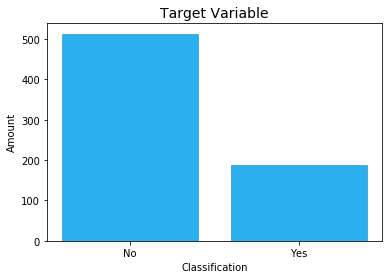

In [53]:
plt.bar(['No', 'Yes'], target.value_counts().values, facecolor = '#2ab0ee', edgecolor='#167aaa', linewidth=0.5)
plt.title('Target Variable', fontsize=14)
plt.xlabel('Classification')
plt.ylabel('Amount')
plt.show()

In [66]:
513/(513 + 189)

0.7307692307692307

The Baseline model would be 73% accurate due to a 'No' classification being correct 73% of the time. Using a machine learning model the accuracy should improve significantly.

In [54]:
#Dummy variables for the categoricals
features_dummies = pd.get_dummies(features)

In [55]:
features_dummies.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,country_Tonga,country_Turkey,country_Ukraine,country_Uruguay,relation_to_patient_'Health care professional',relation_to_patient_Others,relation_to_patient_Parent,relation_to_patient_Relative,relation_to_patient_Self,relation_to_patient_unknown
0,1,1,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
3,1,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


## Creating and testing models

In [56]:
#Separate data into train/test sets
from sklearn.model_selection import train_test_split

X = features_dummies
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


### **Decision Tree**

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [58]:
#Decision Tree
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
pred = tree_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[99  0]
 [ 0 42]]
              precision    recall  f1-score   support

          NO       1.00      1.00      1.00        99
         YES       1.00      1.00      1.00        42

   micro avg       1.00      1.00      1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



In [60]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 100.0%


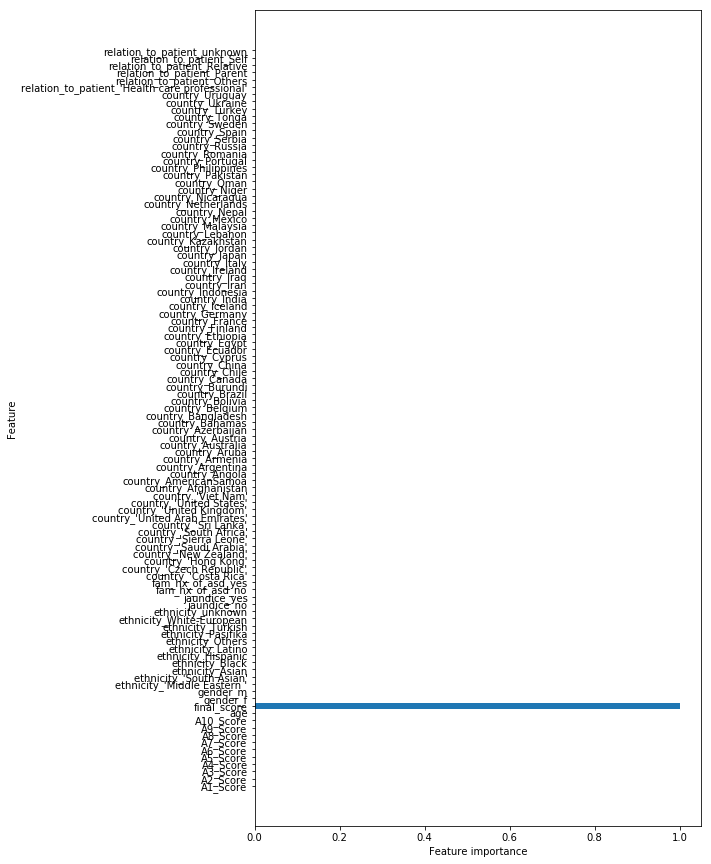

In [61]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,15))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances(tree_clf)

### **Logistic Regression**

In [62]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
pred = logreg_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[94  5]
 [ 1 41]]
              precision    recall  f1-score   support

          NO       0.99      0.95      0.97        99
         YES       0.89      0.98      0.93        42

   micro avg       0.96      0.96      0.96       141
   macro avg       0.94      0.96      0.95       141
weighted avg       0.96      0.96      0.96       141



In [64]:
print("Testing Accuracy for Logistic Regression Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Logistic Regression Classifier: 95.74%


### **Support Vector Machine**

In [67]:
from sklearn import svm

In [68]:
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [69]:
pred = svm_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[99  0]
 [ 0 42]]
              precision    recall  f1-score   support

          NO       1.00      1.00      1.00        99
         YES       1.00      1.00      1.00        42

   micro avg       1.00      1.00      1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



In [70]:
print("Testing Accuracy for Support Vector Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Support Vector Classifier: 100.0%


### **Random Forest**

In [71]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [72]:
pred = rf_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[97  2]
 [ 2 40]]
              precision    recall  f1-score   support

          NO       0.98      0.98      0.98        99
         YES       0.95      0.95      0.95        42

   micro avg       0.97      0.97      0.97       141
   macro avg       0.97      0.97      0.97       141
weighted avg       0.97      0.97      0.97       141



In [73]:
print("Testing Accuracy for Random Forest Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Random Forest Classifier: 97.16%


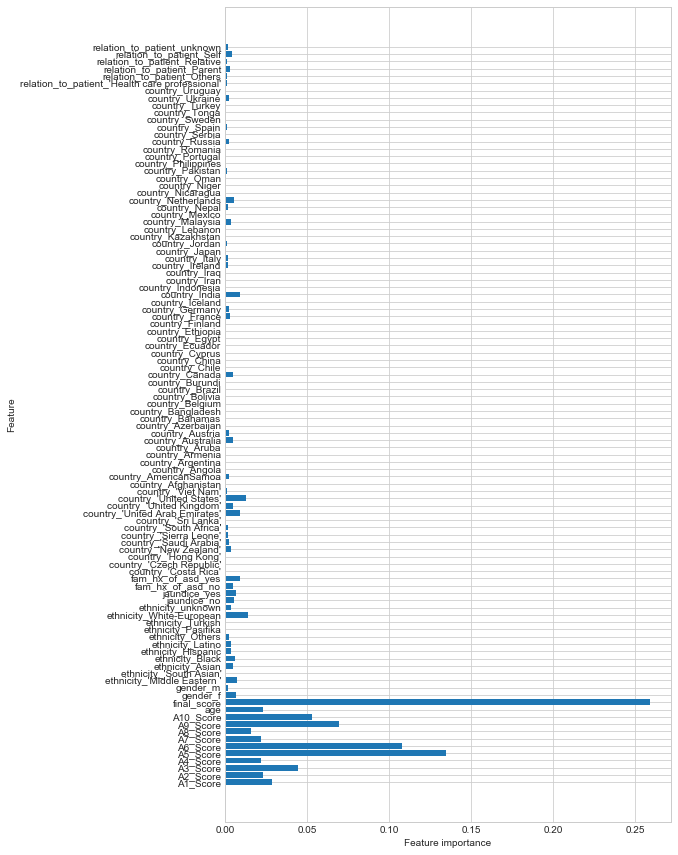

In [79]:
plot_feature_importances(rf_clf)

### **XG Boost**

In [74]:
#XG Boost
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [75]:
pred = xgb_clf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[99  0]
 [ 0 42]]
              precision    recall  f1-score   support

          NO       1.00      1.00      1.00        99
         YES       1.00      1.00      1.00        42

   micro avg       1.00      1.00      1.00       141
   macro avg       1.00      1.00      1.00       141
weighted avg       1.00      1.00      1.00       141



In [76]:
print("Testing Accuracy for XGBoost Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for XGBoost Classifier: 100.0%


### GridSearch with Random Forest

In [81]:
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    "n_estimators": [10, 30, 100],
"criterion": ['gini', 'entropy'],
"max_depth": [None, 2, 6, 10],
"min_samples_split": [5, 10],
"min_samples_leaf": [3, 6]
}

rf_grid_search =GridSearchCV(rf_clf, rf_param_grid, cv = 3)
rf_grid_search.fit(X_test, y_test)

print("Testing Accuracy: {:.4}%".format(rf_grid_search.best_score_ * 100))

print("Optimal Parameters: {}".format(rf_grid_search.best_params_))

Testing Accuracy: 100.0%
Optimal Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


Using GridSearch, I was able to increase the accuracy score from 97.16% to 100% by changing parameters.

### Conclusion

 - Autism Spectrum Disorder (ASD) screening tools are useful for minimizing healthcare costs due to unneccessary doctor visits
 - Screening dataset used to build models to predict ASD diagnosis
 - Accuracy scores of 100% were obtained using Decision Tree, Random Forest, Support Vector Machine and XGBoost

### Future Work

 - More samples should be obtained to improve model
 - Datasets including other ages could be combined to further usefulness of screening